# Blind Vision

In [258]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point


def check_interception(boundary_lines, object_lines):
    """
    Check if the object in the image is colliding with
    the boundaries.
    """
    for i in boundary_lines:
        line1 =  LineString([i[0], i[1]])
        for j in object_lines:
            line2 =  LineString([j[0], j[1]])
            ip = line1.intersection(line2)
            # If there is an interception
            if not ip.is_empty:
                return True
    return False


def detect_lines(img_name):
    """
    Algorithm for detecting the Zebra crossing lines.
    """
    # Read in the image
    img = cv2.imread(img_name, cv2.IMREAD_COLOR)
    
    # Keep original copy of the image
    img_original = img.copy()

    # Convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Perform Gaussian blur
    blur = cv2.GaussianBlur(gray, (21,21), 0)

    # Find edges with Canny Edge Detection
    lower = 40
    upper = 140
    edges = cv2.Canny(blur, lower, upper)

    # Using Houghlines ---
    # Detect lines using Hough Lines Transform
    lines = cv2.HoughLines(image=edges, rho=1, theta=np.pi/180, threshold=55)

    # Store the lines that are boundaries
    boundaries = []

    if lines is not None:
        for line in lines:
            rho = line[0][0] # Extract the line's rho (distance from 0,0)
            theta = line[0][1] # Extract the line's theta (rotation angle in radians) 
            # Only choose lines that are verticle
            # less than 0.7 rad (around 30 deg)
            # greater than 2.5 rad (around 150 deg)
            if theta < 0.7 or theta > 2.5:
                # Converting from polar to cartesian
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                point1 = (x1, y1)
                point2 = (x2, y2)
                boundaries.append([point1, point2])
                # Draw lines between points
                cv2.line(img, point1, point2, (255, 0, 0), 5)

        # Placing centre point
        # Get dimensions of the image
        y, x, _ = img.shape

        # Define points that will make up the rectangle
        y_mid = round(y / 2)
        x_mid = round (x / 2)
        y_scale = round(y / 10)
        x_scale = round(x / 10)
        x1 = x_mid - x_scale 
        x2 = x_mid + x_scale
        y1 = y_mid - y_scale
        y2 = y_mid + y_scale
        c_point1 = (x1, y1)
        c_point2 = (x2, y2)

        # The lines that make up the rectangle
        rect_lines = [
            [(x1, y1), (x1, y2)], # left of rec
            [(x2, y1), (x2, y2)], # right of rec
            [(x1, y2), (x2, y2)], # top of rec
            [(x1, y1), (x2, y1)], # bottom of rec
        ]

        # Check if safe or dangerous
        danger = check_interception(boundaries, rect_lines)

        if danger:
            print("Prediction: Danger")
            cv2.rectangle(img, c_point1, c_point2, (255,100,0), 3) # Red/orange rectangle
        else:
            print("Prediction: Safe")
            cv2.rectangle(img, c_point1, c_point2, (0,255,0), 3) # Green rectangle

        # Display images
        fig, axes = plt.subplots(1,3, figsize=(15, 5))
        axes[0].imshow(img_original)
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        axes[1].imshow(edges)
        axes[1].axis('off')
        axes[1].set_title('Edge Dection')
        axes[2].imshow(img)
        axes[2].set_title('Result Image')
        axes[2].axis('off')
        plt.show()
    else:
        print("No lines")

---------------------------------------
Img 1 (Prefectly ideal crossing (safe))
Prediction: Safe


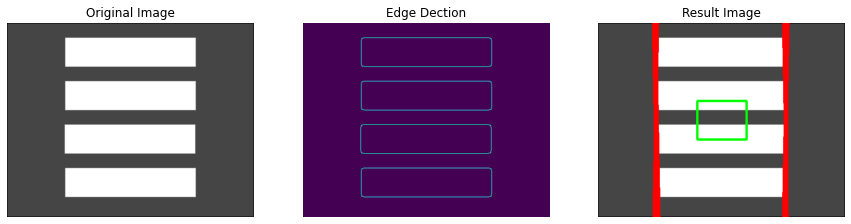

---------------------------------------
Img 2 (Prefectly ideal crossing (danger))
Prediction: Danger


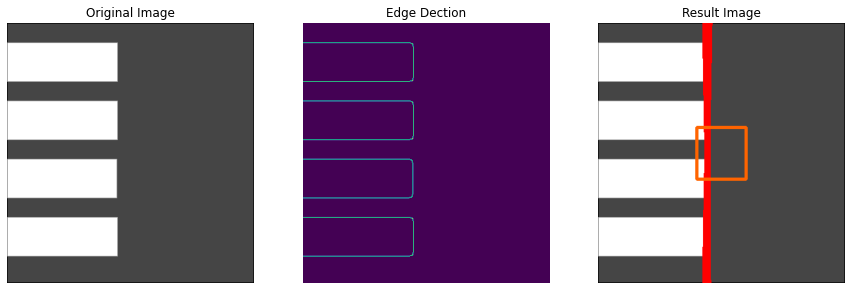

---------------------------------------
Img 3 (Ideal crossing (safe))
Prediction: Safe


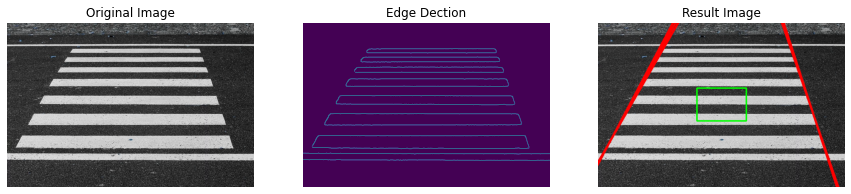

---------------------------------------
Img 4 (Ideal crossing (danger))
Prediction: Danger


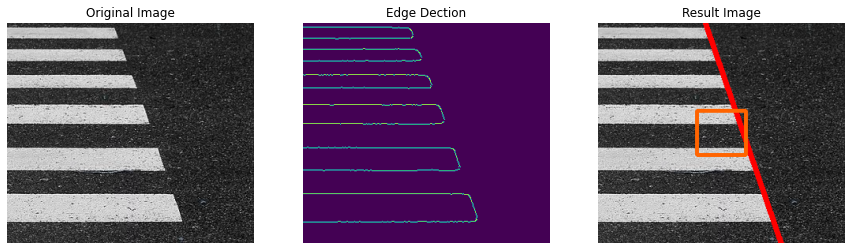

---------------------------------------
Img 5 (Ideal crossing (safe))
Prediction: Safe


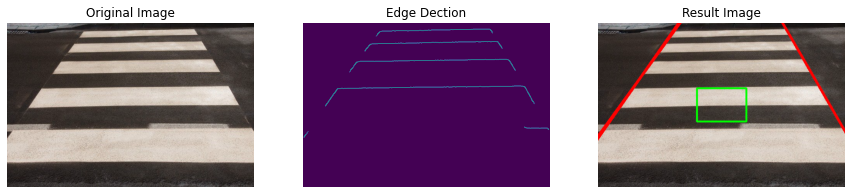

---------------------------------------
Img 6 (Ideal crossing (danger)
Prediction: Danger


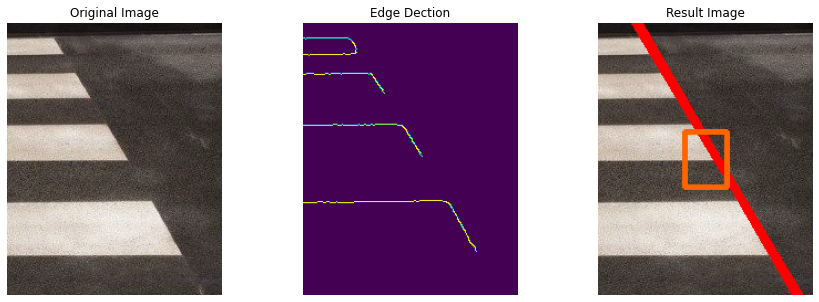

---------------------------------------
Img 7 (Ideal crossing (danger))
Prediction: Danger


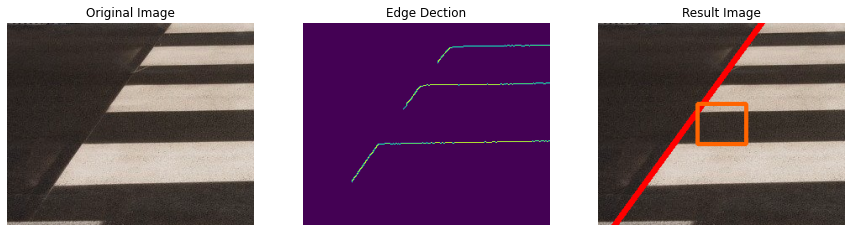

---------------------------------------
Img 8 (Ideal crossing (safe))
Prediction: Safe


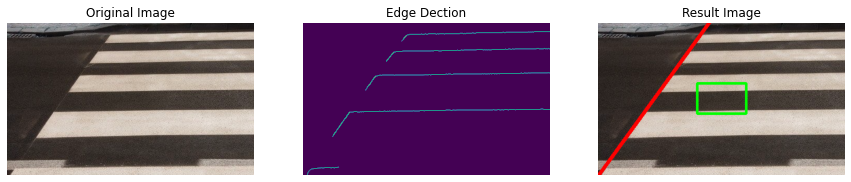

---------------------------------------
Img 9 (Well-worn crossing (safe))
Prediction: Danger


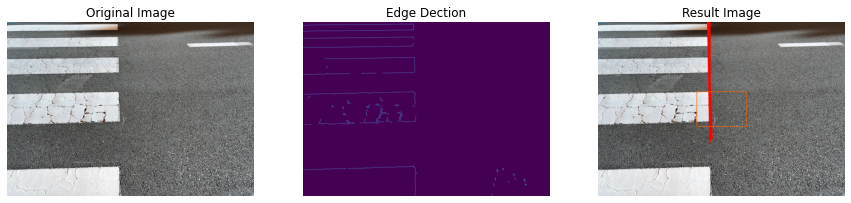

---------------------------------------
Img 10 (Well-worn crossing (danger))
Prediction: Safe


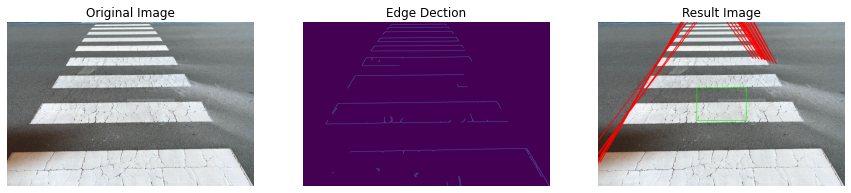

In [261]:
# Display results
print("---------------------------------------")
print("Img 1 (Prefectly ideal crossing (safe))")
detect_lines('imgs/zebra_1.png')

print("---------------------------------------")
print("Img 2 (Prefectly ideal crossing (danger))")
detect_lines('imgs/zebra_1_half.png')

print("---------------------------------------")
print("Img 3 (Ideal crossing (safe))")
detect_lines('imgs/zebra_2.jpg')

print("---------------------------------------")
print("Img 4 (Ideal crossing (danger))")
detect_lines('imgs/zebra_2_half.jpg')

print("---------------------------------------")
print("Img 5 (Ideal crossing (safe))")
detect_lines('imgs/zebra_5.jpg')

print("---------------------------------------")
print("Img 6 (Ideal crossing (danger)")
detect_lines('imgs/zebra_5_half.jpg')

print("---------------------------------------")
print("Img 7 (Ideal crossing (danger))")
detect_lines('imgs/zebra_5_half_2.jpg')

print("---------------------------------------")
print("Img 8 (Ideal crossing (safe))")
detect_lines('imgs/zebra_5_2.jpg')

print("---------------------------------------")
print("Img 9 (Well-worn crossing (safe))")
detect_lines('imgs/zebra_3.jpeg')

print("---------------------------------------")
print("Img 10 (Well-worn crossing (danger))")
detect_lines('imgs/zebra_4.jpeg')